# Read data

This code aims to read the data

In [7]:
import numpy as np
import os, gzip, sys
import matplotlib.pyplot as plt
np.random.seed(0)

def deltaPhi(phi1,phi2):
    x = phi1-phi2
    while x>= np.pi: x -= np.pi*2.
    while x< -np.pi: x += np.pi*2.
    return x

def deltaR(eta1,phi1,eta2,phi2):
    return (deltaPhi(phi1,phi2)**2+(eta1-eta2)**2)**0.5

# reading jet data from the gzipped text stream
# constituents format
_index, _type, _pid, _charge, _pt, _eta, _phi, _vx, _vy, _vz = range(10)
def parse_jet_data(fin):
    
    if '<jet_data>' not in fin.readline().decode():
        print(">>> ERROR: invalid input", flush=True)
        sys.exit(0)
    data = {}
    buf = fin.readline().decode().split() # jet kinematics
    data['index'] = int(buf[0])
    data['pt'] = float(buf[1])
    data['eta'] = float(buf[2])
    data['phi'] = float(buf[3])
    data['mass'] = float(buf[4])
    data['deltaeta'] = float(buf[5])
    data['deltaphi'] = float(buf[6])
    data['charge'] = int(buf[7])
    data['ehadovereem'] = float(buf[8])
    data['ncharged'] = int(buf[9])
    data['nneutrals'] = int(buf[10])
    data['tau1'] = float(buf[11])
    data['tau2'] = float(buf[12])
    data['tau3'] = float(buf[13])
    data['tau4'] = float(buf[14])
    data['tau5'] = float(buf[15])
    buf = fin.readline().decode().split() # trimmed/pruned/softdrop P4
    data['pt_trimmed'] = float(buf[0])
    data['eta_trimmed'] = float(buf[1])
    data['phi_trimmed'] = float(buf[2])
    data['mass_trimmed'] = float(buf[3])
    data['pt_pruned'] = float(buf[4])
    data['eta_pruned'] = float(buf[5])
    data['phi_pruned'] = float(buf[6])
    data['mass_pruned'] = float(buf[7])
    data['pt_pruned_sub1'] = float(buf[8])
    data['eta_pruned_sub1'] = float(buf[9])
    data['phi_pruned_sub1'] = float(buf[10])
    data['mass_pruned_sub1'] = float(buf[11])
    data['pt_pruned_sub2'] = float(buf[12])
    data['eta_pruned_sub2'] = float(buf[13])
    data['phi_pruned_sub2'] = float(buf[14])
    data['mass_pruned_sub2'] = float(buf[15])
    data['pt_pruned_sub3'] = float(buf[16])
    data['eta_pruned_sub3'] = float(buf[17])
    data['phi_pruned_sub3'] = float(buf[18])
    data['mass_pruned_sub3'] = float(buf[19])
    data['pt_softdrop'] = float(buf[20])
    data['eta_softdrop'] = float(buf[21])
    data['phi_softdrop'] = float(buf[22])
    data['mass_softdrop'] = float(buf[23])
    data['pt_softdrop_sub1'] = float(buf[24])
    data['eta_softdrop_sub1'] = float(buf[25])
    data['phi_softdrop_sub1'] = float(buf[26])
    data['mass_softdrop_sub1'] = float(buf[27])
    data['pt_softdrop_sub2'] = float(buf[28])
    data['eta_softdrop_sub2'] = float(buf[29])
    data['phi_softdrop_sub2'] = float(buf[30])
    data['mass_softdrop_sub2'] = float(buf[31])
    data['pt_softdrop_sub3'] = float(buf[32])
    data['eta_softdrop_sub3'] = float(buf[33])
    data['phi_softdrop_sub3'] = float(buf[34])
    data['mass_softdrop_sub3'] = float(buf[35])
    buf = fin.readline().decode().split() # subject/constituents counts
    data['nsub_trimmed'] = int(buf[0])
    data['nsub_pruned'] = int(buf[1])
    data['nsub_softdrop'] = int(buf[2])
    data['nconstituents'] = int(buf[3])
    buf = fin.readline().decode().split() # generater info
    data['gen_pid'] = int(buf[0])
    data['gen_charge'] = int(buf[1])
    data['gen_pt'] = float(buf[2])
    data['gen_eta'] = float(buf[3])
    data['gen_phi'] = float(buf[4])
    data['gen_mass'] = float(buf[5])
    
    clist = [] # prepare constituents list
    for i in range(data['nconstituents']):
        var = [float(s) for s in fin.readline().decode().split()] # index, type(0:gen/1:track/2:Ecal/3:Hcal), pid, charge, pt, eta, phi, vx, vy, vz
        # relative to jet pt and direction
        var[_pt ] = var[_pt]/data['pt']
        var[_eta] = var[_eta]-data['eta']
        var[_phi] = deltaPhi(var[_phi],data['phi'])
        clist.append(var)
    clist = np.array(clist)

    buf = fin.readline().decode().split() # Tjet variables, nsub = 1
    data['tjet1_eta1'] = float(buf[0])
    data['tjet1_phi1'] = float(buf[1])
    buf = fin.readline().decode().split()
    data['tjet1_R1'] = float(buf[0])
    data['tjet1_R1_pt1'] = float(buf[1])
    data['tjet1_R1_m1'] = float(buf[2])
    buf = fin.readline().decode().split()
    data['tjet1_R2'] = float(buf[0])
    data['tjet1_R2_pt1'] = float(buf[1])
    data['tjet1_R2_m1'] = float(buf[2])
    buf = fin.readline().decode().split()
    data['tjet1_R3'] = float(buf[0])
    data['tjet1_R3_pt1'] = float(buf[1])
    data['tjet1_R3_m1'] = float(buf[2])
    buf = fin.readline().decode().split()
    data['tjet1_R4'] = float(buf[0])
    data['tjet1_R4_pt1'] = float(buf[1])
    data['tjet1_R4_m1'] = float(buf[2])

    buf = fin.readline().decode().split() # Tjet variables, nsub = 2
    data['tjet2_eta1'] = float(buf[0])
    data['tjet2_phi1'] = float(buf[1])
    buf = fin.readline().decode().split()
    data['tjet2_eta2'] = float(buf[0])
    data['tjet2_phi2'] = float(buf[1])
    buf = fin.readline().decode().split()
    data['tjet2_R1'] = float(buf[0])
    data['tjet2_R1_pt1'] = float(buf[1])
    data['tjet2_R1_pt2'] = float(buf[2])
    data['tjet2_R1_m1'] = float(buf[3])
    data['tjet2_R1_m2'] = float(buf[4])
    buf = fin.readline().decode().split()
    data['tjet2_R2'] = float(buf[0])
    data['tjet2_R2_pt1'] = float(buf[1])
    data['tjet2_R2_pt2'] = float(buf[2])
    data['tjet2_R2_m1'] = float(buf[3])
    data['tjet2_R2_m2'] = float(buf[4])
    buf = fin.readline().decode().split()
    data['tjet2_R3'] = float(buf[0])
    data['tjet2_R3_pt1'] = float(buf[1])
    data['tjet2_R3_pt2'] = float(buf[2])
    data['tjet2_R3_m1'] = float(buf[3])
    data['tjet2_R3_m2'] = float(buf[4])
    buf = fin.readline().decode().split()
    data['tjet2_R4'] = float(buf[0])
    data['tjet2_R4_pt1'] = float(buf[1])
    data['tjet2_R4_pt2'] = float(buf[2])
    data['tjet2_R4_m1'] = float(buf[3])
    data['tjet2_R4_m2'] = float(buf[4])

    buf = fin.readline().decode().split() # Tjet variables, nsub = 3
    data['tjet3_eta1'] = float(buf[0])
    data['tjet3_phi1'] = float(buf[1])
    buf = fin.readline().decode().split()
    data['tjet3_eta2'] = float(buf[0])
    data['tjet3_phi2'] = float(buf[1])
    buf = fin.readline().decode().split()
    data['tjet3_eta3'] = float(buf[0])
    data['tjet3_phi3'] = float(buf[1])
    buf = fin.readline().decode().split()
    data['tjet3_R1'] = float(buf[0])
    data['tjet3_R1_pt1'] = float(buf[1])
    data['tjet3_R1_pt2'] = float(buf[2])
    data['tjet3_R1_pt3'] = float(buf[3])
    data['tjet3_R1_m1'] = float(buf[4])
    data['tjet3_R1_m2'] = float(buf[5])
    data['tjet3_R1_m3'] = float(buf[6])
    buf = fin.readline().decode().split()
    data['tjet3_R2'] = float(buf[0])
    data['tjet3_R2_pt1'] = float(buf[1])
    data['tjet3_R2_pt2'] = float(buf[2])
    data['tjet3_R2_pt3'] = float(buf[3])
    data['tjet3_R2_m1'] = float(buf[4])
    data['tjet3_R2_m2'] = float(buf[5])
    data['tjet3_R2_m3'] = float(buf[6])
    buf = fin.readline().decode().split()
    data['tjet3_R3'] = float(buf[0])
    data['tjet3_R3_pt1'] = float(buf[1])
    data['tjet3_R3_pt2'] = float(buf[2])
    data['tjet3_R3_pt3'] = float(buf[3])
    data['tjet3_R3_m1'] = float(buf[4])
    data['tjet3_R3_m2'] = float(buf[5])
    data['tjet3_R3_m3'] = float(buf[6])
    buf = fin.readline().decode().split()
    data['tjet3_R4'] = float(buf[0])
    data['tjet3_R4_pt1'] = float(buf[1])
    data['tjet3_R4_pt2'] = float(buf[2])
    data['tjet3_R4_pt3'] = float(buf[3])
    data['tjet3_R4_m1'] = float(buf[4])
    data['tjet3_R4_m2'] = float(buf[5])
    data['tjet3_R4_m3'] = float(buf[6])

    if '</jet_data>' not in fin.readline().decode():
        print(">>> ERROR: invalid input", flush=True)
        sys.exit(0)
    
    return data, clist

In [8]:
sig_zip = 'jet_data/fatjet_w_match_vz_to_ww.txt.gz'
bkg_zip = 'jet_data/fatjet_q_match_vz_to_qq.txt.gz'

sig_path = os.path.join(os.getcwd(), sig_zip)
bkg_path = os.path.join(os.getcwd(), bkg_zip)

w_fin = gzip.open(sig_path)
q_fin = gzip.open(bkg_path)

In [9]:
w_type = np.zeros(4)
q_type = np.zeros(4)

max_w_pid = np.zeros(2212+1)
max_q_pid = np.zeros(2212+1)

for i in range(10000):
    if i % 1000 == 0:
        print(i)
    w_partial = parse_jet_data(w_fin)[1]
    q_partial = parse_jet_data(q_fin)[1]

    for j in range(len(w_partial)):
        # type 1 ; pid 2
        w_type[int(w_partial[j][1])] += 1
        max_w_pid[int(w_partial[j][2])] += 1
    for j in range(len(q_partial)):
        # type 1 ; pid 2
        q_type[int(q_partial[j][1])] += 1
        max_q_pid[int(q_partial[j][2])] += 1

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


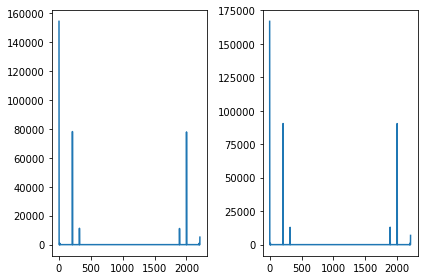

In [11]:
fig, axs = plt.subplots(1,2)

plt.subplot(axs[0])
plt.plot(np.arange(2213), max_w_pid)

plt.subplot(axs[1])
plt.plot(np.arange(2213), max_q_pid)

plt.tight_layout()

In [13]:
for i in range(max_w_pid.shape[0]):
    if max_w_pid[i] != 0:
        print(i)
print('----')
for i in range(max_q_pid.shape[0]):
    if max_q_pid[i] != 0:
        print(i)

0
1
11
13
211
321
1892
2002
2200
2202
2212
----
0
1
11
13
211
321
1892
2002
2200
2202
2212
